## 소개
### 1.배경
#### 다양한 장비/서비스에서 일어나는 시스템 데이터를 통해 사용자의 불편을 예지하기 위해 ‘시스템 데이터’와 ‘사용자 불편 발생 데이터’를 분석하여 불편을 느낀 사용자와 불편 요인들을 찾아주세요.
### 2.목적
#### 데이터를 통해 사용자가 불편을 느끼는 원인 분석

## 데이터셋에 대한 설명

### 학습 데이터 (user_id : 10000 ~ 24999, 15000명)


			train_quality_data.csv : 시스템 퀄리티 로그

			train_problem_data.csv : 사용자 불만 및 불만이 접수된 시간

			train_err_data.csv : 시스템에 발생한 에러 로그



### 테스트 데이터(user_id : 30000 ~ 44998, 14999명)


			test_quality_data.csv : 시스템 퀄리티 로그

			test_err_data.csv : 시스템에 발생한 에러 로그

			sample_submission.csv : 사용자 불만 확률(0~1) (제출용)

## 컬럼별 설명
#### train_quality_data
- time : 로그발생시간 
- user_id : 사용자ID
- fwver : 펌웨어버전
- quality_0 ~ quality_12 : 번호가 매겨진 각 퀄리티  
---
#### train_problem_data
- user_id : 사용자ID
- time : 불만접수시간
---
#### train_err_data
- user_id : 사용자ID
- time : 로그발생시간
- model_nm : 모델명
- fwver : 펌웨어버전
- errtype : 에러타입
- errcode : 에러코드
---


# EDA

In [2]:
# 기본 모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [47]:
# path 지정
base_path = "/content/drive/MyDrive/Colab Notebooks/data/235687_시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/"
save_path = "/content/drive/MyDrive/Colab Notebooks/data/235687_시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/result/"

In [63]:
# train data 불러오기
train_quality = pd.read_csv(base_path+'train_quality_data.csv')
train_problem = pd.read_csv(base_path+'train_problem_data.csv')
train_error = pd.read_csv(base_path+'train_err_data.csv')
test_quality = pd.read_csv(base_path+'test_quality_data.csv')
test_error = pd.read_csv(base_path+'test_err_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Train Data 파일이 3개??
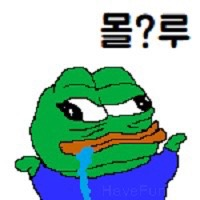    왜????

In [5]:
pd.options.display.max_columns=50
pd.options.display.max_rows=200

## quaulity data 확인해보기

In [6]:
train_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        828624 non-null  int64  
 1   user_id     828624 non-null  int64  
 2   fwver       788544 non-null  object 
 3   quality_0   684192 non-null  float64
 4   quality_1   828624 non-null  int64  
 5   quality_2   788511 non-null  float64
 6   quality_3   828624 non-null  int64  
 7   quality_4   828624 non-null  int64  
 8   quality_5   828604 non-null  object 
 9   quality_6   828624 non-null  int64  
 10  quality_7   828624 non-null  object 
 11  quality_8   828624 non-null  object 
 12  quality_9   828624 non-null  object 
 13  quality_10  828624 non-null  object 
 14  quality_11  828624 non-null  int64  
 15  quality_12  828624 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 101.2+ MB


### 총 828624행

#### quality에서 전처리 해줘야할 컬럼
fwver : 05.15.2138 과 같이 되어있음 (object)  
quality_5, 7,8,9,10 : object

In [7]:
train_quality["quality_0"].nunique()

753

In [8]:
train_quality["quality_1"].nunique()

31

In [9]:
train_quality["quality_2"].nunique()

798

In [10]:
train_quality["quality_0"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
828619    0.0
828620    0.0
828621    0.0
828622    0.0
828623    0.0
Name: quality_0, Length: 828624, dtype: float64

In [11]:
train_quality["quality_5"].nunique()

4744

In [12]:
train_quality["quality_7"].nunique()

908

In [13]:
train_quality["quality_8"].nunique()

52

In [14]:
train_quality["quality_9"].nunique()

539

In [15]:
train_quality["quality_10"].nunique()

4200

In [16]:
train_quality["quality_5"]

0         0
1         0
2         0
3         0
4         0
         ..
828619    1
828620    0
828621    3
828622    0
828623    9
Name: quality_5, Length: 828624, dtype: object

In [17]:
train_quality.head(10)

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
2,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
3,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
4,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
5,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
6,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,4,0,0,0,0,4,0,0
7,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
8,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
9,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0


In [18]:
train_quality.tail(10)

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
828614,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0,0,0,0,0,17,0,0
828615,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,2,0,0,0,0,17,0,0
828616,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0,0,0,0,0,17,0,0
828617,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0,0,0,0,0,17,0,0
828618,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,2,0,0,0,0,17,0,0
828619,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,1,0,0,0,0,17,0,0
828620,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0,0,0,0,0,17,0,0
828621,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,3,0,0,0,0,17,0,0
828622,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0,0,0,0,0,17,0,0
828623,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,9,0,0,0,0,17,0,0


### quaulity data는 과거로부터의 2020년11월24일 03시30분부터  2020년 11월29일 09시00분 까지의 데이터가 내림차순으로 정렬되어 있는것 같습니다.

In [19]:
train_quality["fwver"].nunique()

27

In [20]:
train_quality["user_id"].nunique()

8281

### 펌웨어는 27번 업데이트 되었으며 집계된 고객은 8281명입니다.

In [21]:
# 결측치 확인
train_quality.isnull().sum()

time               0
user_id            0
fwver          40080
quality_0     144432
quality_1          0
quality_2      40113
quality_3          0
quality_4          0
quality_5         20
quality_6          0
quality_7          0
quality_8          0
quality_9          0
quality_10         0
quality_11         0
quality_12         0
dtype: int64

## problem data 확인해보기

In [22]:
train_problem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  5429 non-null   int64
 1   time     5429 non-null   int64
dtypes: int64(2)
memory usage: 85.0 KB


In [23]:
train_problem.head(10)

,user_id,time
0,19224,20201102200000
1,23664,20201116140000
2,15166,20201114130000
3,12590,20201108210000
4,15932,20201103210000
5,16852,20201119150000
6,23427,20201121110000
7,13507,20201111160000
8,11274,20201118120000
9,20610,20201127230000


In [24]:
train_problem.tail(10)

,user_id,time
5419,13579,20201124150000
5420,14980,20201121110000
5421,18383,20201114110000
5422,21420,20201110160000
5423,24150,20201130120000
5424,20167,20201125120000
5425,16270,20201110120000
5426,19114,20201106230000
5427,21505,20201104110000
5428,18822,20201102120000


In [25]:
train_problem["user_id"].nunique()

5000

In [26]:
train_problem["time"].nunique()

488

In [27]:
train_problem["time"].max()

20201130230000

In [28]:
train_problem["time"].min()

20201101000000

### 불만접수를 한 고객은 5000명이며, problem data는 2020년 11월01일부터 2020년 11월30일 23시까지의 데이터입니다.

In [29]:
# 결측치 확인
train_problem.isnull().sum()

user_id    0
time       0
dtype: int64

In [30]:
train_problem.describe()

,user_id,time
count,5429.000000,5.429000e+03
mean,17567.540615,2.020112e+13
std,4330.245143,8.611525e+06
min,10001.000000,2.020110e+13
25%,13778.000000,2.020111e+13
50%,17616.000000,2.020112e+13
75%,21346.000000,2.020112e+13
max,24998.000000,2.020113e+13


## error data 확인해보기

In [31]:
train_error.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554663 entries, 0 to 16554662
Data columns (total 6 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   int64 
 1   time      int64 
 2   model_nm  object
 3   fwver     object
 4   errtype   int64 
 5   errcode   object
dtypes: int64(3), object(3)
memory usage: 757.8+ MB


In [32]:
train_error.head(10)

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0
5,10000,20201101050516,model_3,05.15.2138,26,1
6,10000,20201101050522,model_3,05.15.2138,4,0
7,10000,20201101060903,model_3,05.15.2138,15,1
8,10000,20201101174754,model_3,05.15.2138,16,1
9,10000,20201101174756,model_3,05.15.2138,4,0


In [33]:
train_error.tail(10)

,user_id,time,model_nm,fwver,errtype,errcode
16554653,24999,20201130074711,model_3,05.15.2138,4,0
16554654,24999,20201130142105,model_3,05.15.2138,15,1
16554655,24999,20201130161510,model_3,05.15.2138,16,1
16554656,24999,20201130161511,model_3,05.15.2138,4,0
16554657,24999,20201130161517,model_3,05.15.2138,4,0
16554658,24999,20201130163051,model_3,05.15.2138,15,1
16554659,24999,20201130172625,model_3,05.15.2138,16,1
16554660,24999,20201130172625,model_3,05.15.2138,4,0
16554661,24999,20201130172631,model_3,05.15.2138,4,0
16554662,24999,20201130210625,model_3,05.15.2138,15,1


In [34]:
train_error["user_id"].nunique()

15000

In [35]:
train_error["time"].max()

20201202185152

In [36]:
train_error["time"].min()

20201031235959

In [37]:
train_error["model_nm"].nunique()

9

In [38]:
train_error["fwver"].nunique()

37

In [39]:
train_error["errtype"].nunique()

41

In [40]:
train_error["errcode"].nunique()

2805

### error 발생을 경험한 고객은 15000명이며 error data는 2020년 10월31일 23시59분59초 부터 2020년 12월02일 18시51분52초 까지의 데이터입니다.  
### error가 발생한 model은 9개이고, 펌웨어는 37번 업데이트 되었으며, 발생한 error의 type은 41가지, errcode는 2805가지입니다.

In [41]:
# 결측치 확인
train_error.isnull().sum()

user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     1
dtype: int64

# 전처리

In [49]:
# time 컬럼의 데이터 처리
import datetime

### error data 시간 변환
error data의 경우 사이즈가 커서 time column을 변환하는데 많은 시간이 소요되었습니다(40분 이상)  
때문에 변환한 결과를 별도의 csv파일로 추출하여 앞으로는 그 파일을 사용할 예정입니다.

In [62]:
train_error.time

0          1970-01-01 05:36:41.101025616
1          1970-01-01 05:36:41.101030309
2          1970-01-01 05:36:41.101030309
3          1970-01-01 05:36:41.101050514
4          1970-01-01 05:36:41.101050515
                        ...             
16554658   1970-01-01 05:36:41.130163051
16554659   1970-01-01 05:36:41.130172625
16554660   1970-01-01 05:36:41.130172625
16554661   1970-01-01 05:36:41.130172631
16554662   1970-01-01 05:36:41.130210625
Name: time, Length: 16554663, dtype: datetime64[ns]

In [64]:
# # error 로그
# train_error.time = pd.to_datetime(train_error.time.astype('str'))
# test_error.time = pd.to_datetime(test_error.time.astype('str'))

In [65]:
# from pandas import DataFrame
# train_error.to_csv("/content/drive/MyDrive/Colab Notebooks/data/235687_시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/convert/train_err_data_.csv", sep=",", na_rep="NaN")

In [66]:
# test_error.to_csv("/content/drive/MyDrive/Colab Notebooks/data/235687_시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/convert/test_err_data_.csv", sep=",", na_rep="NaN")

In [67]:
train_error.head()

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,2020-11-01 02:56:16,model_3,05.15.2138,15,1
1,10000,2020-11-01 03:03:09,model_3,05.15.2138,12,1
2,10000,2020-11-01 03:03:09,model_3,05.15.2138,11,1
3,10000,2020-11-01 05:05:14,model_3,05.15.2138,16,1
4,10000,2020-11-01 05:05:15,model_3,05.15.2138,4,0


In [68]:
test_error.head()

,user_id,time,model_nm,fwver,errtype,errcode
0,30000,2020-11-01 03:02:27,model_1,04.16.3553,31,1
1,30000,2020-11-01 03:02:27,model_1,04.16.3553,33,2
2,30000,2020-11-01 03:02:28,model_1,04.16.3553,15,1
3,30000,2020-11-01 03:02:56,model_1,04.16.3553,22,1
4,30000,2020-11-01 03:03:00,model_1,04.16.3553,11,1


### problem data 시간 변환

In [50]:
# problem 로그
train_problem.time = pd.to_datetime(train_problem.time.astype('str'))
problem_user = train_problem.user_id.unique()
new_problem_user = list(set(train_error.user_id.unique()) - set(problem_user))

In [53]:
train_problem.head()

,user_id,time
0,19224,2020-11-02 20:00:00
1,23664,2020-11-16 14:00:00
2,15166,2020-11-14 13:00:00
3,12590,2020-11-08 21:00:00
4,15932,2020-11-03 21:00:00


### quality data 시간 변환


In [51]:
# quality 로그
new_train_quality = train_quality[['time','user_id']].drop_duplicates().reset_index(drop=True)
new_train_quality.time = pd.to_datetime(new_train_quality.time.astype('str'))

In [56]:
new_train_quality.head()

,time,user_id
0,2020-11-29 09:00:00,10000
1,2020-11-30 21:00:00,10000
2,2020-11-04 11:00:00,10002
3,2020-11-06 01:00:00,10002
4,2020-11-11 01:00:00,10002


# 모델링

In [ ]:

import datetime as dt
from tqdm import tqdm
import gc
import random
import lightgbm as lgb
import re
from sklearn.metrics import *
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings(action='ignore')

# 필요한 함수 정의
def make_datetime(x):
    # string 타입의 Time column을 datetime 타입으로 변경
    x     = str(x)
    year  = int(x[:4])
    month = int(x[4:6])
    day   = int(x[6:8])
    hour  = int(x[8:10])
    #mim  = int(x[10:12])
    #sec  = int(x[12:])
    return dt.datetime(year, month, day, hour)

def string2num(x):
    # (,)( )과 같은 불필요한 데이터 정제
    x = re.sub(r"[^0-9]+", '', str(x))
    if x =='':
        return 0
    else:
        return int(x)


PATH = '{데이터가 저장된 폴더 경로}'

In [ ]:
# 데이터 설명을 확인하면
# ueser_id가 10000부터 24999까지 총 15000개가 연속적으로 존재.
display(train_error.head())
train_user_id_max = 24999
train_user_id_min = 10000
train_user_number = 15000

In [ ]:
print(np.sort(train_error.errtype.unique()))
# errtype이 1부터 42까지 29를 제외한 41개가 존재.

In [ ]:
# user_id와 errtype만을 사용하여 데이터 셋 생성
# 모든 일자에 대해서 errtype별 발생 건수를 count
# pandas의 groupby를 활용할 경우 큰 연산 자원이 필요.
# numpy로 placeholder를 만들어 구현함.
id_error = train_error[['user_id','errtype']].values
error = np.zeros((train_user_number,42))

for person_idx, err in tqdm(id_error):
    # person_idx - train_user_id_min 위치에 person_idx, errtype에 해당하는 error값을 +1
    error[person_idx - train_user_id_min,err - 1] += 1
error.shape

In [ ]:
problem = np.zeros(15000)
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
problem[train_problem.user_id.unique()-10000] = 1
problem.shape

In [ ]:
# 변수 이름 변경
# error  -> train_x
# problem-> train_y

train_x = error
train_y = problem
del error, problem
print(train_x.shape)
print(train_y.shape)

In [ ]:
# Light-gbm 모델 훈련
# Train
#-------------------------------------------------------------------------------------
# validation auc score를 확인하기 위해 정의
def f_pr_auc(probas_pred, y_true):
    labels=y_true.get_label()
    p, r, _ = precision_recall_curve(labels, probas_pred)
    score=auc(r,p) 
    return "pr_auc", score, True
#-------------------------------------------------------------------------------------
models     = []
recalls    = []
precisions = []
auc_scores   = []
threshold = 0.5
# 파라미터 설정
params =      {
                'boosting_type' : 'gbdt',
                'objective'     : 'binary',
                'metric'        : 'auc',
                'seed': 1015
                }
#-------------------------------------------------------------------------------------
# 5 Kfold cross validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in k_fold.split(train_x):

    # split train, validation set
    X = train_x[train_idx]
    y = train_y[train_idx]
    valid_x = train_x[val_idx]
    valid_y = train_y[val_idx]

    d_train= lgb.Dataset(X, y)
    d_val  = lgb.Dataset(valid_x, valid_y)
    
    #run traning
    model = lgb.train(
                        params,
                        train_set       = d_train,
                        num_boost_round = 1000,
                        valid_sets      = d_val,
                        feval           = f_pr_auc,
                        verbose_eval    = 20, 
                        early_stopping_rounds = 3
                       )
    
    # cal valid prediction
    valid_prob = model.predict(valid_x)
    valid_pred = np.where(valid_prob > threshold, 1, 0)
    
    # cal scores
    recall    = recall_score(    valid_y, valid_pred)
    precision = precision_score( valid_y, valid_pred)
    auc_score = roc_auc_score(   valid_y, valid_prob)

    # append scores
    models.append(model)
    recalls.append(recall)
    precisions.append(precision)
    auc_scores.append(auc_score)

    print('==========================================================')

In [ ]:
# 교차검증 점수 확인
print(np.mean(auc_scores))

In [ ]:
# 제출 파일 생성
test_err  = pd.read_csv(base_path+'test_err_data.csv')
display(test_err.head())

In [ ]:
# 데이터 설명을 확인하면
# test 데이터는 ueser_id가 30000부터 44998까지 총 14999개가 존재.
test_user_id_max = 44998
test_user_id_min = 30000
test_user_number = 14999

In [ ]:
id_error = test_err[['user_id','errtype']].values
test_x = np.zeros((test_user_number,42))
for person_idx, err in tqdm(id_error):
    # person_idx - test_user_id_min 위치에 person_idx, errtype에 해당하는 error값을 +1
    test_x[person_idx - test_user_id_min,err - 1] += 1
test_x = test_x.reshape(test_x.shape[0],-1)
print(test_x.shape)

In [ ]:
# 예측
pred_y_list = []
for model in models:
    pred_y = model.predict(test_x)
    pred_y_list.append(pred_y.reshape(-1,1))
    
pred_ensemble = np.mean(pred_y_list, axis = 0)

In [ ]:
pred_ensemble

In [ ]:
sample_submssion = pd.read_csv(base_path+'sample_submission.csv')

In [ ]:
sample_submssion['problem'] = pred_ensemble.reshape(-1)

In [ ]:
sample_submssion.to_csv("dacon_baseline.csv", index = False)
sample_submssion